<p style="align: center;"><img align=center src="images/all.png" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Cité antique de Fréjus Fréjus</b></h3>

<h3 style="text-align: center;"><b>Analyse de données envirnnementales et archéologiques avec les outils de l'apprentissage autolatique</b></h3>

## Plan

1. load and prepare data
2. look at the data repartition (balance of target classe, caracteristics quantitative and qualitative of numerical and categorical features)
3. EDA
4. What to do with inbalanced target classes

    В случае неравных классов нужно подбирать баланс классов для обучения и метрику, которая будет корректно отражать качество классификации

    Выбор метрики нужно делать с фокусом на предметную область, предварительно обрабатывая данные и, возможно, сегментируя (как в случае с делением на богатых и бедных клиентов)
    
    
5. Application of algorithmes:
        5.1. Random Forest
        5.2. Xgboost
        5.3. CatBoost
        5.4. Logistic Regression
6. Reflexion: what the models tell us? Score? How to improve? (another model, enrichir the data, regler les parametres)
7. Faut-il enrichir les données (comment le model classifie avec le different quantité de données)
8. Feature Engeeninring
9. Feature Importance
10. Refaire Models on modified dataset
11. Reflexion
12. Perspectives d'utilisation de ce models / utilité

## 1. find, load and prepare data

#### Raster layers
after searching the data, choosing which ones will be pertinents, we are choosed the following data to include into out analysis:

- distance pondérée aux cours d'eau
- distance pondérée de sites aux cours d'eau
- slope (pentes)
- aspect (exposition)
- elevation
- Hillshade_9am
- Hillshade_Noon
- Hillshade_3pm
- soil types (going to be one-hot-encoded) (types d'occupatio du sol - CORINE LandCover Layer)

for all of these layers describe an theorical importance for human attractivity. And then the importance defined by algorithms like boruta, Random Forest and statistical (khi-2)

Expliquer pourquois on a choisi ces couches. La signification/apport de chaque couche dans l'étude

#### Source of the data
MNE a la base de certain layers: https://earthexplorer.usgs.gov/
Acquisition Date 	2010/11/11
EarthExplorer - FGDC Metadata - GMTED2010 - GMTED2010N30E000
Originator:  U.S. Geological Survey (USGS)
Title:  Global Multi-Resolution Terrain Elevation Data 2010 (GMTED2010)
Geospatial_Data_Presentation_Form:  GeoTIFF
Abstract:  The USGS and the NGA have collaborated on the development of a notably enhanced global elevation model named the GMTED2010 that replaces GTOPO30 as the elevation dataset of choice for global and continental scale applications.  The new model has been generated at three separate resolutions (horizontal post spacing) of 30 arc-seconds (about 1 kilometer), 15 arc-seconds (about 500 meters), and 7.5 arc-seconds (about 250 meters).  This new product suite provides global coverage of all land areas from latitude 84 degrees N to 56 degrees S for most products, and coverage from 84 degrees N to 90 degrees S for several products.  Some areas, namely Greenland and Antarctica, do not have data available at the 15- and 7.5-arc-second resolutions because the input source data do not support that level of detail.

30x30 meters

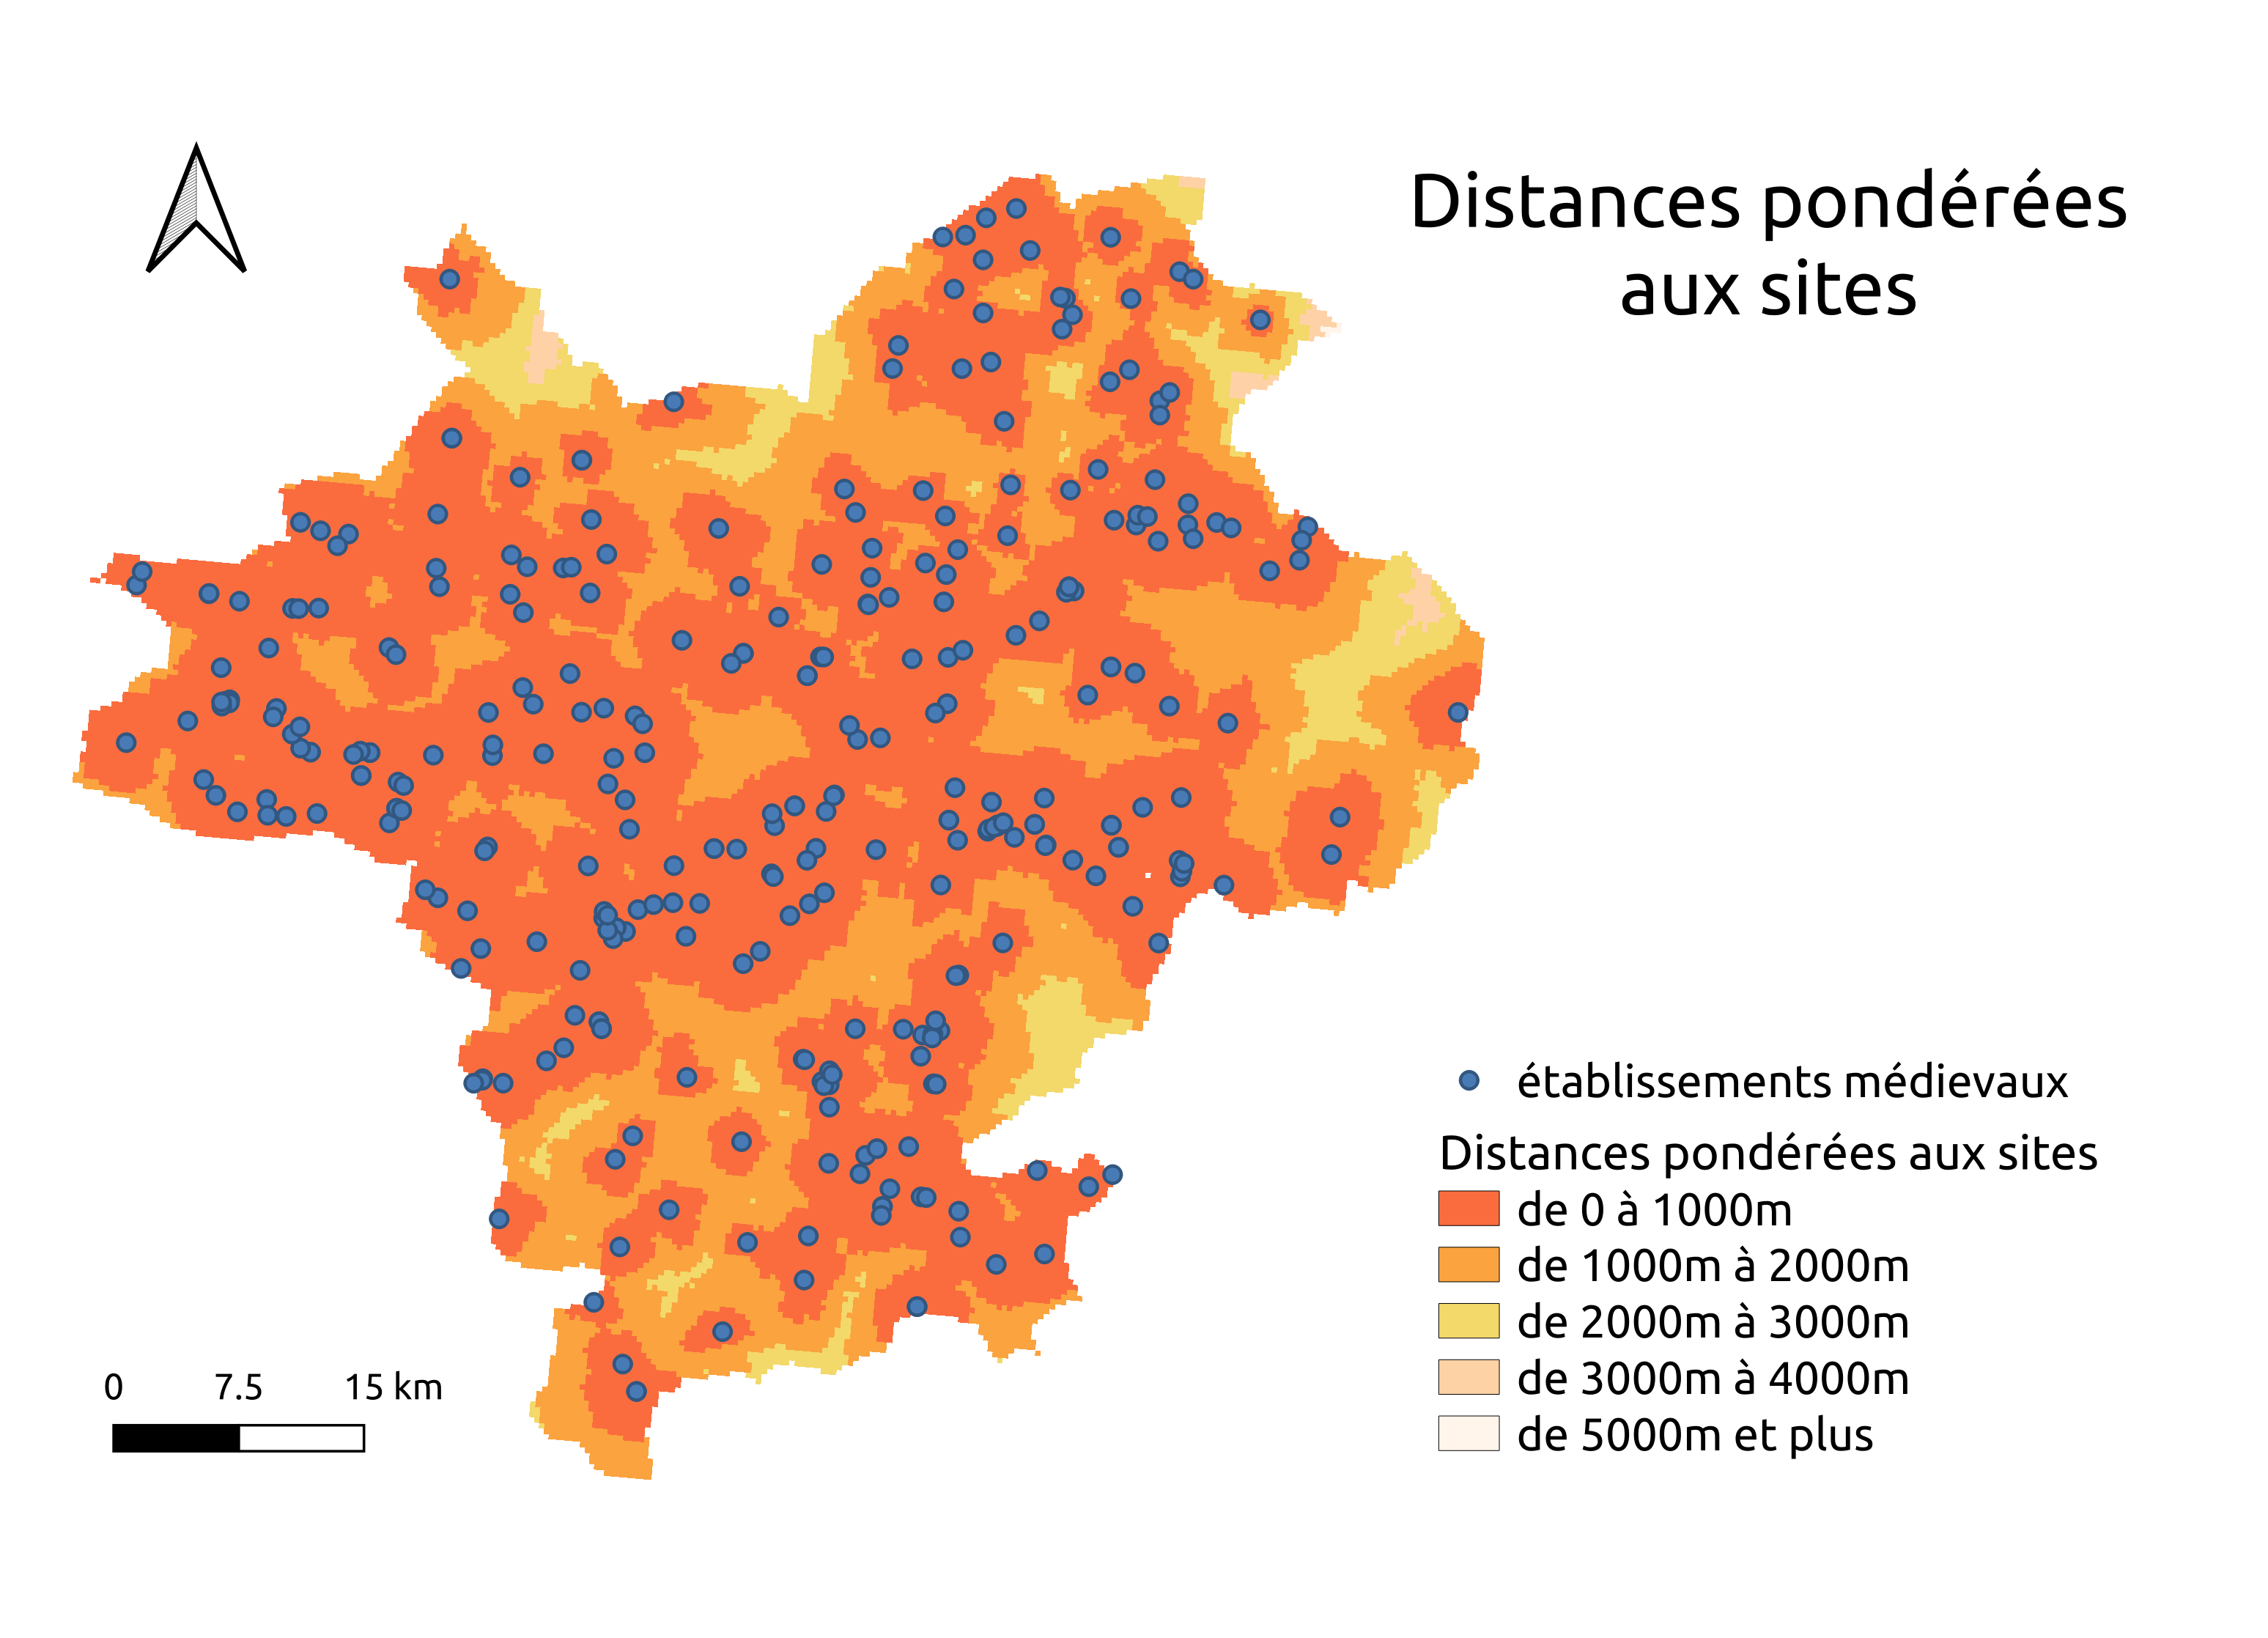

## Traitement dans le QGIS

- 1. distance pondérée aux sites
derivée. produit à partir de MNE. Tool/algorithm de production:

resulting layer:

<img align=center src="images/ccss.png" width=600 height=450/>

<p>2. pentes -- calculated using ArcGIS / tested on QGIS. Tool:; Parameters</p>

<img align=center src="images/slope.png" width=600 height=450/>

3. exposition -- calculated using ArcGIS / tested on QGIS. Tool:; Parameters:

5. Hillshade_1 -- calculated using ArcGIS / tested on QGIS. Tool:; Parameters:
<p><img align=center src="images/hillshade0.png"/></p>

6. Hillshade_2 -- calculated using ArcGIS / tested on QGIS. Tool:; Parameters:
<p><img align=center src="images/hillshade_default.png"/></p>

7. soil types (going to be one-hot-encoded) -- 
CORINE Land Cover - France métropolitaine - Changements 1990-2000
Inventaire biophysique du changement d'occupation des sols entre 1990 et 2000 suivant la
nomenclature CORINE Land Cover en 44 postes.
This period was took because its the period of the most intences archaeological researches (probably I should show a graph showing this dynamic of researchs)
CLC 2000
https://land.copernicus.eu/pan-european/corine-land-cover/clc-2000

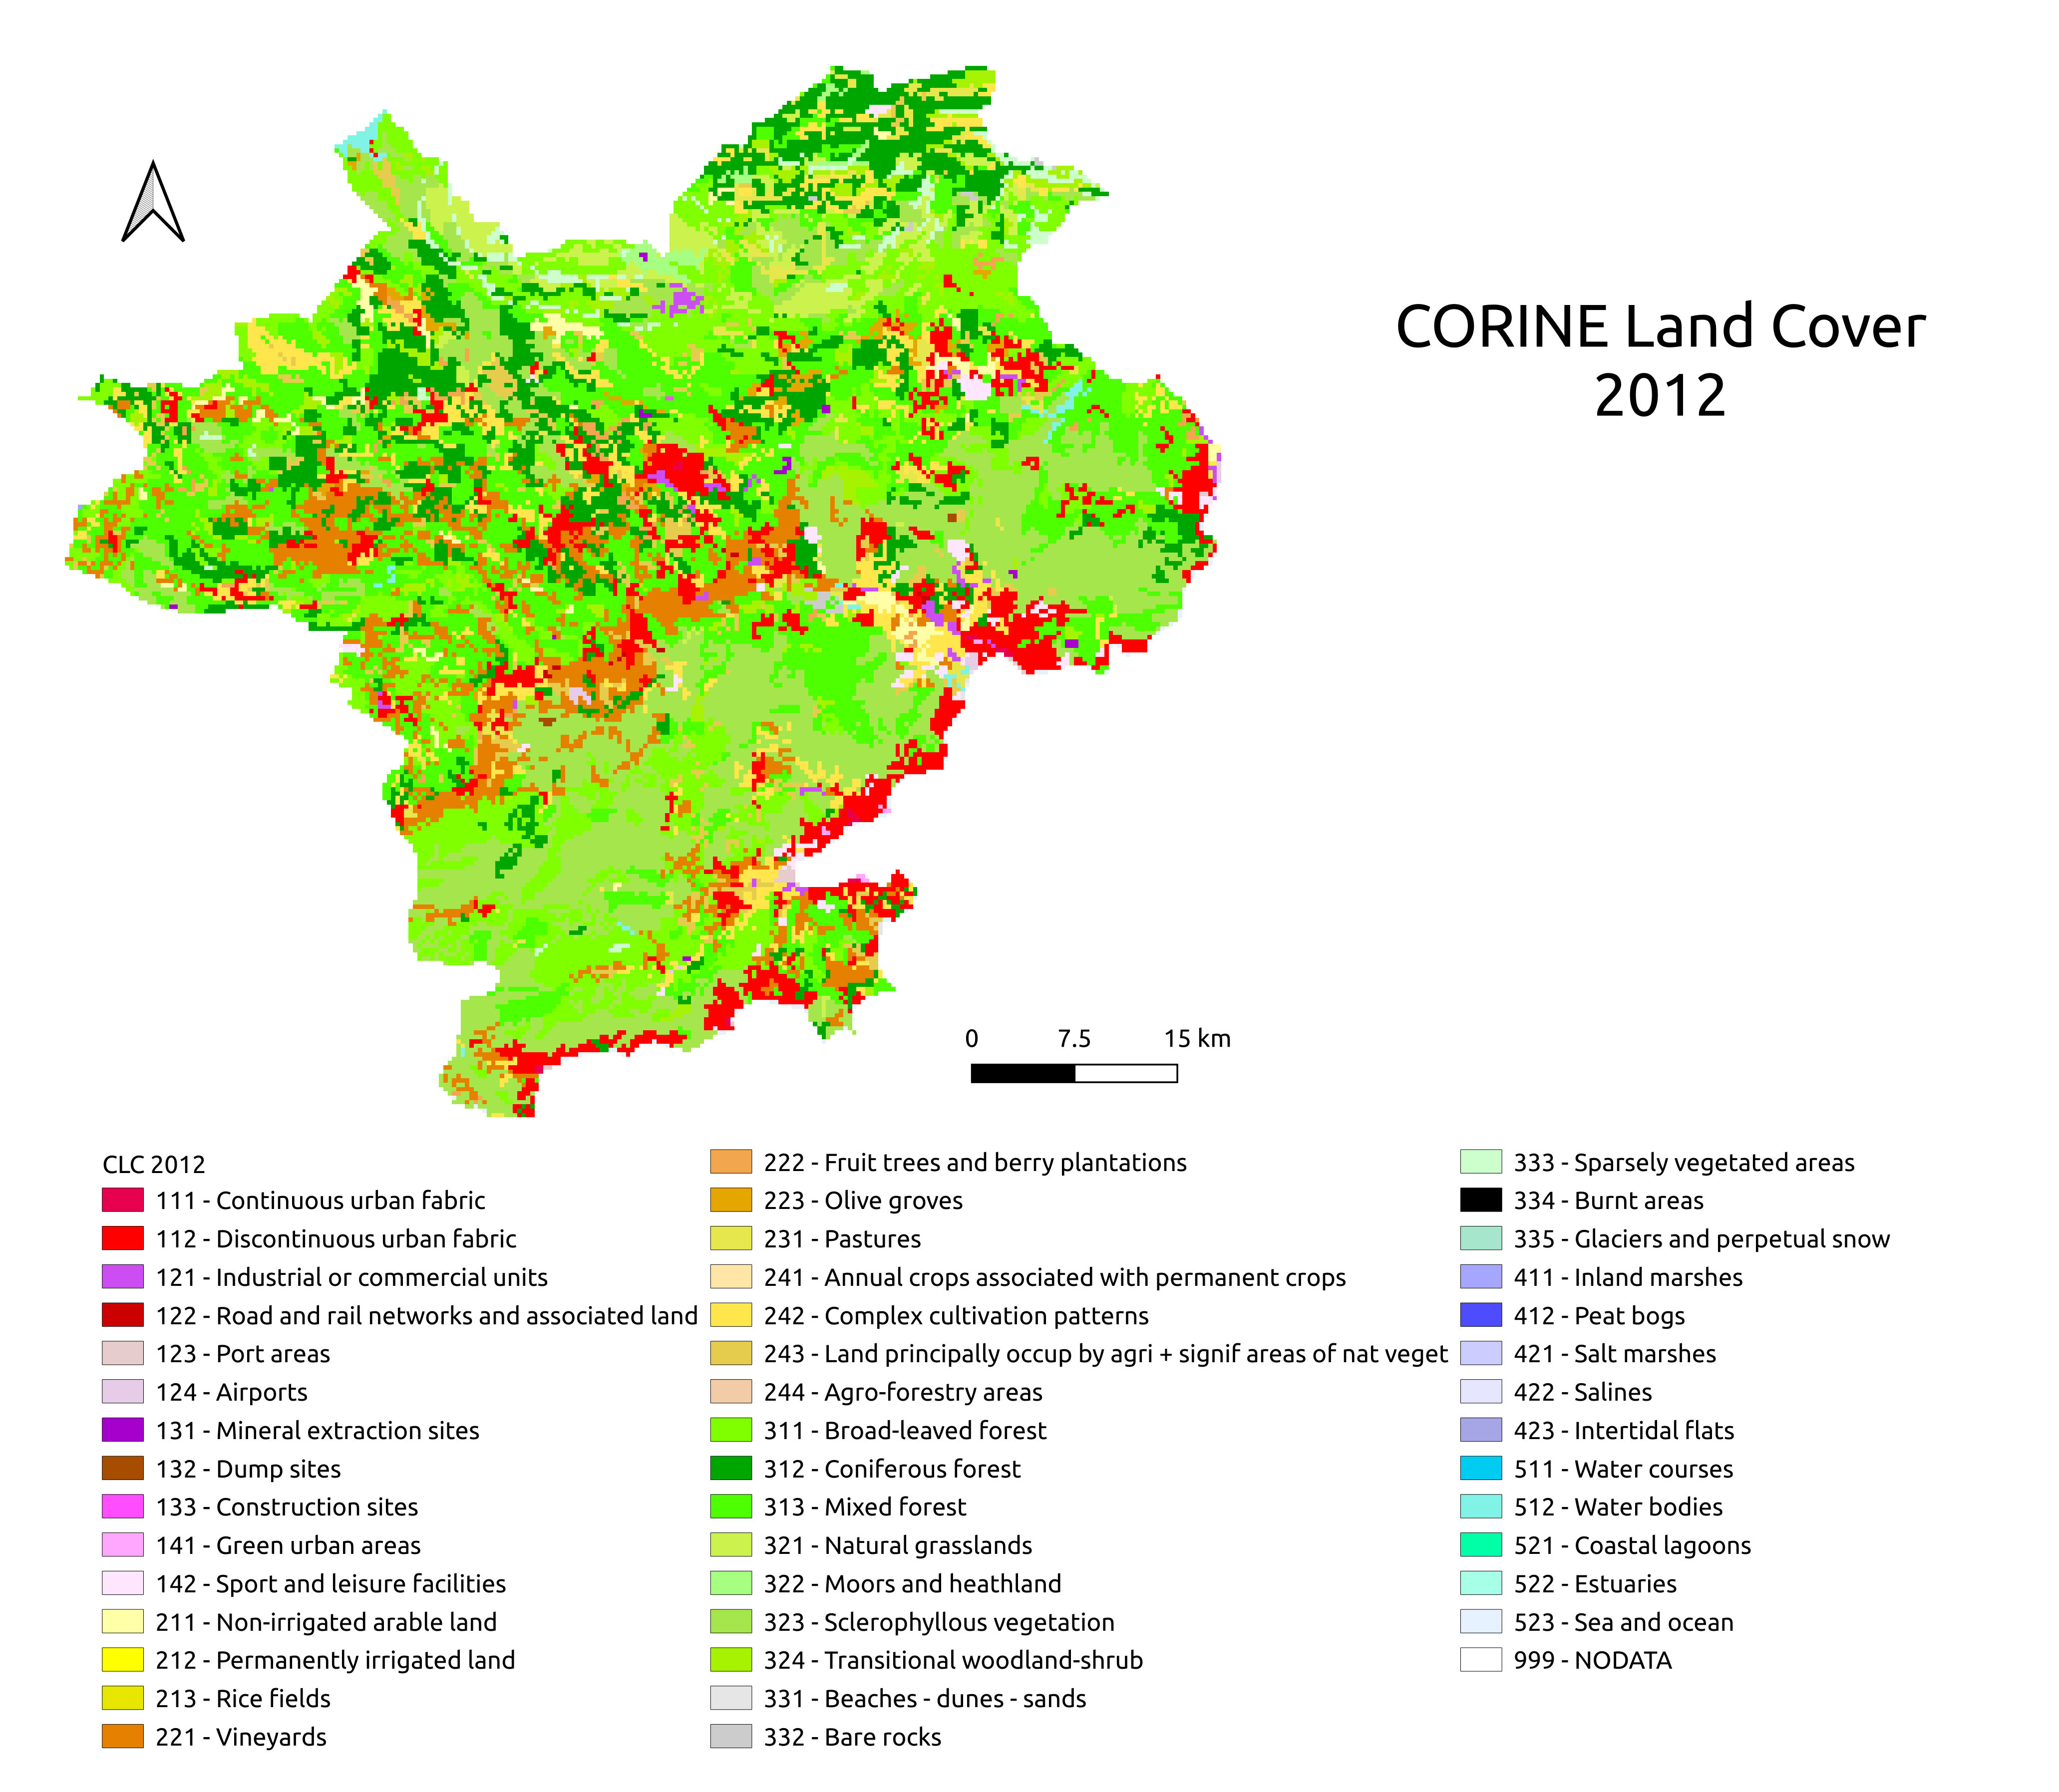

## TODO
distance cost
calculer le coût dans la mesure de temp (voir le fascule)

----------

VRAI distance cost
cumulative distance between sites + slope + dist to hydro

----------
## Remarque
A real problem would include many other factors, like soils, surface vegetation, slope constraints over minimum segments, etc., but this would only lengthen the analysis, and not change the basic way you are applying the tools. 

#### Some data traitement was made
<...>

In [1]:
# load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# load data
df = pd.read_csv('data/cite0.csv', sep=',')

# Let's look to the data. Analyse exploratoire (EDA)

In [8]:
df.head()

,NUMPOINTS,aspect,elevation,slope,hillshade,hill_def,soil_Airports,soil_Bare rocks,"soil_Beaches, dunes, sands",soil_Broad-leaved forest,...,hydro_slop_4,hydro_slop_5,hydro_slop_6,hydro_slop_7,hydro_slop_8,hydro_slop_9,hydro_slop_10,hydro_slop_11,hydro_slop_12,hydro_slop_13
0,1,149.500168,18,1.310321,125,177,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,173.853363,68,3.030992,113,173,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,274.605530,1155,11.034988,68,203,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,210.585388,494,5.606198,85,175,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,167.471191,22,1.425842,122,177,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(22324, 51)

There is 22324 lines (pixels) and 12 columns

In [10]:
df.isna().sum()

NUMPOINTS                                                                                      0
aspect                                                                                         0
elevation                                                                                      0
slope                                                                                          0
hillshade                                                                                      0
hill_def                                                                                       0
soil_Airports                                                                                  0
soil_Bare rocks                                                                                0
soil_Beaches, dunes, sands                                                                     0
soil_Broad-leaved forest                                                                       0
soil_Burnt areas              

# Prétraitement

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('NUMPOINTS', axis=1)
y = df.NUMPOINTS

TODO: explain why I choosed this method to split the data

In [13]:
features, X_test, target, y_test = train_test_split(X, y, test_size=0.26, random_state=2)
features.shape, X_test.shape

((16519, 50), (5805, 50))

### Train validation split

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.26, random_state=102)

In [15]:
X_train.shape, X_valid.shape

((12224, 50), (4295, 50))

In [16]:
# убедимся, что в обеих выборках оказалось одинакове количество признаков
print('Количество признаков в train:', len(X_train.columns))
print('Количество признаков в valid:', len(X_valid.columns))
# для случая, если это не так
print(set(X_train.columns) - set(X_valid.columns))
print(set(X_valid.columns) - set(X_train.columns))

Количество признаков в train: 50
Количество признаков в valid: 50
set()
set()


### Target

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
X = df.drop('NUMPOINTS', axis=1)
y = df.NUMPOINTS

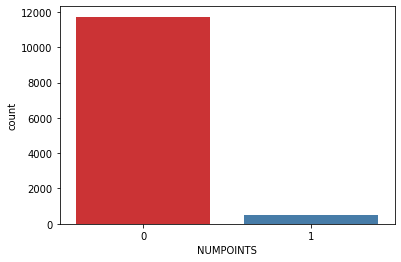

0    95.95877
1     4.04123
Name: NUMPOINTS, dtype: float64

In [19]:
# train dataset
train = pd.concat([X_train, y_train], axis=1)
ax = sns.countplot(x="NUMPOINTS", data=train, palette="Set1")
plt.show()

# в процентах
train['NUMPOINTS'].value_counts() / len(train) * 100

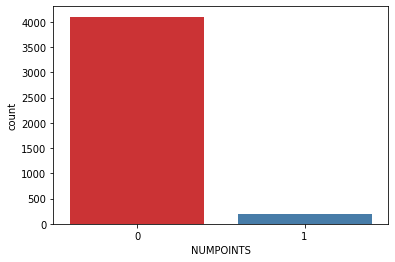

0    95.48312
1     4.51688
Name: NUMPOINTS, dtype: float64

In [20]:
# validation data
valid = pd.concat([X_valid, y_valid], axis=1)
ax = sns.countplot(x="NUMPOINTS", data=valid, palette="Set1")
plt.show()

# в процентах
valid['NUMPOINTS'].value_counts() / len(valid) * 100

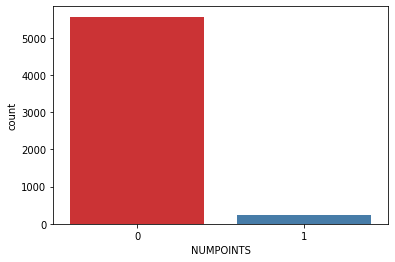

0    95.917313
1     4.082687
Name: NUMPOINTS, dtype: float64

In [21]:
# test dataset
test_set = pd.concat([X_test, y_test], axis=1)
ax = sns.countplot(x="NUMPOINTS", data=test_set, palette="Set1")
plt.show()
# в процентах
test_set['NUMPOINTS'].value_counts() / len(test_set) * 100

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [23]:
# learn model
clf_rf = RandomForestClassifier(n_estimators=200,
                                criterion='entropy',
                                max_depth=15,
                                random_state=102)

clf_rf0 = clf_rf.fit(X_train, y_train)

In [24]:
# predictions
# y_pred = best_rf.predict_proba(X_valid)[:,1]
# y_true is y_valid

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, clf_rf0.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, clf_rf0.predict_proba(X_valid)[:,1]))

ROC-AUC для обучающей выборки:     0.9984666811628718
ROC-AUC для валидационной выборки: 0.6882140890956944


## 2. RandomizedSearchCV¶

In [25]:
# RandomizedSearchCV

clf_rf_rand = RandomForestClassifier()

params_rf_rand = {'criterion': ['entropy', 'gini'],
             'max_depth': range(1, 21),
             'min_samples_split': range(2, 11, 2),
             'min_samples_leaf': range(1, 11, 2),
             'n_estimators':[100, 200]}

search_rf_random = RandomizedSearchCV(clf_rf_rand, params_rf_rand, 
                                cv=5, n_jobs=-1)

search_rf_random.fit(X_train, y_train)
search_rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 7,
 'criterion': 'entropy'}

In [26]:
# predictions
# y_pred = search_rf_random.predict_proba(X_valid)[:,1]
# y_true is y_valid

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, search_rf_random.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, search_rf_random.predict_proba(X_valid)[:,1]))

ROC-AUC для обучающей выборки:     0.8785934194131797
ROC-AUC для валидационной выборки: 0.6953772904270269


### 3. GridSearchCV

In [ ]:
# GridSearchCV based on RandomizedSearchCV

clf_rf = RandomForestClassifier(random_state=42)

params_rf = {'criterion': ['entropy', 'gini'],
             'max_depth': [20, 26],
             'min_samples_split': [6, 7],
             'min_samples_leaf': [3, 5],
             'n_estimators':[200, 350, 600]}

search_rf_grid = GridSearchCV(clf_rf, params_rf, 
                                cv=5, n_jobs=-1)

search_rf_grid.fit(X_train, y_train)
search_rf_grid.best_params_

In [ ]:
# predictions
# y_pred = search_rf_random.predict_proba(X_valid)[:,1]
# y_true is y_valid

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, search_rf_grid.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, search_rf_grid.predict_proba(X_valid)[:,1]))

### 4. Best parameters¶

In [ ]:
best_rf = RandomForestClassifier(n_estimators=800,
                                 criterion='entropy',
                                 max_depth=5,
                                 min_samples_split=4,  
                                 min_samples_leaf=1, 
                                 random_state=42)

best_rf.fit(X_train, y_train)

# predictions
y_pred = best_rf.predict_proba(X_valid)[:,1]
# y_true is y_valid

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, best_rf.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, y_pred))
print('ROC-AUC для тестовой выборки:     ',  roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

### 5. Predictions for best classifier

In [ ]:
# predictions
# y_pred = best_rf.predict_proba(X_valid)[:,1]
# y_true is y_valid

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, best_rf.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, best_rf.predict_proba(X_valid)[:,1]))
print('ROC-AUC для тестовой выборки:     ',  roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

## Visualize

In [ ]:
# функция для обучения модели и подсчета roc-auc
import time
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, roc_curve, classification_report

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc_prob = roc_auc_score(y_test, y_pred_prob)
    time_taken = time.time()-t0
    print("ROC-AUC = {}".format(roc_auc_prob))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    # probs = model.predict_proba(X_test)[:, 1]
    fper, tper, thresholds = roc_curve(y_test, y_pred_prob) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc_prob, time_taken

# отрисовка ROC кривой и confusion matrix
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
model_rf, roc_auc_rf, tt_rf = run_model(best_rf, X_train, y_train, X_valid, y_valid)

## If performance is not satisfactory...

https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

Есть три общих подхода к улучшению существующей модели машинного обучения:

- Используйте больше (высококачественных) данных и функций
- Настроить гиперпараметры алгоритма
- Попробуйте другие алгоритмы

Они представлены в том порядке, в котором я их обычно пробую.


- отбор фичей, уменьшение их количества
- Другие способы уменьшения количества признаков: PCA, ICA 

## Improve quality

- feature importance
- feature engeeniring
- configure parameters
- enrichir les données? - See Проанализировать, как качество на обучении и тесте меняется в зависимости от объема обучающей выборки.

### Варьируем число фолдов

In [ ]:
e = []
for n in range(3, 7):
    model_rf = RandomForestClassifier(random_state=42)
    params_grid = {'max_depth':[5], "n_estimators":[350], 'criterion':['entropy']}
    search_grid = GridSearchCV(model_rf, params_grid, n_jobs=-1, cv=n)
    search_grid.fit(X, y)
    y_pred = search_grid.predict_proba(X)[:,1]
    auc = roc_auc_score(y, y_pred)
    print("cv =", n, ":", auc)
    e.append(auc)

In [ ]:
e = []
for n in range(3, 11):
    model_rf = RandomForestClassifier(random_state=42, max_depth=n, n_estimators=300)
    model_rf.fit(X_train, y_train)
    y_pred_train = model_rf.predict_proba(X_train)[:,1]
    auc = roc_auc_score(y_train, y_pred_train)
    print("max_depth =", n, ":", auc)
    e.append(auc)

In [ ]:
e = []
for n in range(3, 11):
    model_rf = RandomForestClassifier(random_state=42, max_depth=n, n_estimators=300)
    model_rf.fit(X_test, y_test)
    y_pred_test = model_rf.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred_test)
    print(auc)
    e.append(auc)

In [ ]:
e = []
for n in range(50, 700, 100):
    model_rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=n)
    model_rf.fit(X_train, y_train)
    y_pred_train = model_rf.predict_proba(X_train)[:,1]
    auc = roc_auc_score(y_train, y_pred_train)
    print("if n_estimators =", n, ", roc_auc:", auc)
    e.append(auc)

Проанализировать, как качество на обучении и тесте меняется в зависимости от объема обучающей выборки.
Faut-il ajouter les données

coursera-yandex-mipt-обучение-на-размеченных-данных

Проанализировать, как качество на обучении и тесте меняется в зависимости от объема обучающей выборки.

Объем обучающей выборки и сложность модели значительно сказываются на времени построения модели. С этой точки зрения строить кривые обучения очень полезно — можно проанализировать, имеет ли смысл добавлять больше данных в обучение.

Вместо поиска по сетке решим другую задачу — проанализируем, как зависит качество модели от количества обучающих объектов выборки. как зависит качество модели от количества обучающих объектов выборки?

Для этого давайте создадим нашу модель. Для начала будем строить случайный лес над 50 деревьями, каждый из которых будет иметь глубину не больше 2. Создаем такой объект


Data preparation

In [ ]:
features = df.drop('NUMPOINTS', axis=1)
target = df.NUMPOINTS

## Зависимость качества обучения от объема обучающей выборки

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn import ensemble, metrics
%pylab inline

In [ ]:
clf_rf = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

И теперь давайте построим следующий график — нам будет интересно посмотреть, как меняется качество на обучающей и тестовой выборке, в зависимости от того, на скольких объектах мы обучаемся.

Для того чтобы получить такие графики, у sklearn есть специальная функция под названием learning_curve. Она позволяет нам сделать следующее — ей можно передать на вход нужный нам алгоритм, передать данные и целевую функцию, а также сказать, в каких пропорциях мы хотим обучаться, то есть на каких долях обучающей выборки мы хотим строить модель.

После этого с помощью этого метода будут построены несколько моделей, мы получим оценку качества на каждом объеме обучающей выборки, и нам будут возвращены размер обучающей выборки, оценки качества на «трейне» и оценка качества на тесте.

Имея такие данные, мы легко сможем проанализировать, как качество на обучении и тесте меняется от объема обучающей выборки. Вот давайте сделаем такую вещь.

Мы передаем в функцию наш классификатор, который мы создали ранее. Далее передаем туда данные, которые мы также подготовили на предварительном шаге. И говорим, что мы будем обучать модель на следующих данных: сначала мы возьмем 0,1 от обучающей выборки и далее будем двигаться с шагом 0,2 до 1. Оценивать качество будем с помощью уже знакомой нам метрики accuracy и будем делать кросс-валидацию на 3 фолда. Давайте запустим.


In [ ]:
# max_depth=5, 100% of data

train_sizes, train_scores, test_scores = learning_curve(clf_rf, features, target, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')

Процесс занимает некоторое время, потому что обучаются довольно много моделей. давайте посмотрим, как выглядит вывод нашей функции.

In [ ]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

Ну для начала мы видим, что train_sizes — размер обучающей выборки — был преобразован из долей в конкретное количество объектов, на которых мы обучались. То есть мы видим, что минимальное количество обучающих объектов в рамках нашего эксперимента составляет 250, максимальное — 2250. Также нам доступны оценки качества на обучении и оценки качества на тесте. Так как у нас проводилась кросс-валидация, я сразу же сделала усреднение по всем фолдам — это делается с помощью команды mean. Аргумент axis = 1 означает, что мы будем усреднять по строчкам. Вот в данном случае каждая строка — это результат измерения кросс-валидации, поэтому нам это подходит.

Теперь давайте построим график. Сразу добавим на график сетку и будем строить две кривые — качество обучения на обучающей выборке и на тестовой выборке.


In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

Давайте посмотрим. Так, мы видим, что в начале качество на обучающей выборке падает — приблизительно до отметки 1250 деревьев, и дальше качество меняется очень медленно. С другой стороны, на тестовой выборке качество продолжает расти приблизительно до этой же точки, и дальше оно также перестает меняться. Какой вывод мы можем сделать из этого? Дальнейший рост обучающей выборки вряд ли скажется на качестве нашей модели. Это говорит о том, что модель данной сложности не может многое выиграть за счет того, что мы обогатим данные. Что же делать в такой ситуации? Кривые обучения для деревьев большей глубины

Давайте попробуем увеличить сложность модели — возможно, это приведет к улучшению ее качества. Так как мы с вами обучали модель на деревьях глубины 2, давайте увеличим глубину деревьев — это даст нам дополнительные возможности.

Снова создаем классификатор RandomForestClassifier, но в этот раз указываем ему параметр max_depth = 10 — это максимально возможная глубина деревьев.


In [ ]:
# max_depth=18, 100% of data
clf_rf = ensemble.RandomForestClassifier(n_estimators = 600, max_depth = 2, random_state = 1)


# Теперь давайте еще раз запустим команду learning_curve и 
# построим кривую обучения на тесте и на обучении, при этом 
# мы будем делать это по тем же самым точкам, по тем же 
# самым долям обучающей выборки.
train_sizes, train_scores, test_scores = learning_curve(clf_rf, features, target, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

In [ ]:
# max_depth=18, 100% of data
clf_rf = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 1)


# Теперь давайте еще раз запустим команду learning_curve и 
# построим кривую обучения на тесте и на обучении, при этом 
# мы будем делать это по тем же самым точкам, по тем же 
# самым долям обучающей выборки.
train_sizes, train_scores, test_scores = learning_curve(clf_rf, features, target, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

In [ ]:
# max_depth=18, 100% of data
clf_rf = ensemble.RandomForestClassifier(n_estimators = 1000, max_depth = 5, random_state = 1)


# Теперь давайте еще раз запустим команду learning_curve и 
# построим кривую обучения на тесте и на обучении, при этом 
# мы будем делать это по тем же самым точкам, по тем же 
# самым долям обучающей выборки.
train_sizes, train_scores, test_scores = learning_curve(clf_rf, features, target, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

In [ ]:
# max_depth=18, 100% of data
clf_rf = ensemble.RandomForestClassifier(n_estimators = 1000, max_depth = 10, random_state = 1)

# Теперь давайте еще раз запустим команду learning_curve и 
# построим кривую обучения на тесте и на обучении, при этом 
# мы будем делать это по тем же самым точкам, по тем же 
# самым долям обучающей выборки.
train_sizes, train_scores, test_scores = learning_curve(clf_rf, features, target, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

In [ ]:
# best classifier
clf_rf = ensemble.RandomForestClassifier(n_estimators = 1000, max_depth = 5,
                                         criterion='entropy', min_samples_split=4,
                                         min_samples_leaf=1, random_state = 1)

# Теперь давайте еще раз запустим команду learning_curve и 
# построим кривую обучения на тесте и на обучении, при этом 
# мы будем делать это по тем же самым точкам, по тем же 
# самым долям обучающей выборки.
train_sizes, train_scores, test_scores = learning_curve(clf_rf, features, target, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

### Results

При 50 деревьях не хватает обобщающей способности модели

## Feature Importance

Отбор признаков является важным этапом построения алгоритмов машинногообучения. Данный этап необходим, чтобы избавиться от шумовых признаков и бла-годаря этому улучшить качество и ускорить работу алгоритмов. Проведенные экспе-рименты подтверждают, что алгоритмы отбора признаков с помощью Random Forestэффективно справляется со своей задачей
http://www.machinelearning.ru/wiki/images/9/96/RysmyatovaCourseFile.pdf

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. The actual calculation of the importance is beyond the scope of this post, but we can use the numbers to make relative comparisons between variables.

In [ ]:
# Код для отрисовки важности фичей 1

imp = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

## Boruta

Boruta explained exactly how you wished someone explained to you
Looking under the hood of Boruta, one of the most effective feature selection algorithms:
https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a

Feature Selection With BorutaPy
Find All Features Carrying Information for Prediction:
https://towardsdatascience.com/feature-selection-with-borutapy-f0ea84c9366

Feature Selection Using Boruta:
https://medium.com/@vikeshsingh37/feature-selection-using-boruta-e5a3605ff161

## Feature engeeniring

- reclass numerical features in order to make them categorical
- delete / generate some features

#### Delete some features

In [ ]:
X_train = X_train.drop(['soil_Dump sites', 'soil_Coastal salt marshes', 'soil_Coastal lagoons'], axis=1)
X_valid = X_valid.drop(['soil_Dump sites', 'soil_Coastal salt marshes', 'soil_Coastal lagoons'], axis=1)
X_test = X_test.drop(['soil_Dump sites', 'soil_Coastal salt marshes', 'soil_Coastal lagoons'], axis=1)

In [ ]:
X_train.head()

In [ ]:
best_rf = RandomForestClassifier(n_estimators=800,
                                 criterion='entropy',
                                 max_depth=5,
                                 min_samples_split=4,  
                                 min_samples_leaf=1, 
                                 random_state=42)

best_rf.fit(X_train, y_train)

# predictions
y_pred = best_rf.predict_proba(X_valid)[:,1]
# y_true is y_valid

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, best_rf.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, best_rf.predict_proba(X_valid)[:,1]))
print('ROC-AUC для тестовой выборки:     ',  roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

In [ ]:
# Код для отрисовки важности фичей 2
fi = pd.DataFrame(best_rf.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)
fi

#### Generate some features

In [ ]:
à suivre

## Random Forest. Again

In [ ]:
à suivre

## Xgboost

In [ ]:
à suivre

## CatBoost¶

data preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('data/cite0.csv', sep='\t')
df['hydro_slop'] = df['hydro_slop'].astype('object')

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(['xcoord', 'ycoord', 'soil_fr.1', 'soil_fr', 'NUMPOINTS'], axis=1)
y = df.NUMPOINTS
X.shape

In [ ]:
X, X_valid, y, y_valid = train_test_split(X, y, test_size=0.24, random_state=42)
X.shape, X_valid.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)
X_train.shape, X_test.shape

In [ ]:
cat_default = cb.CatBoostClassifier(cat_features=cat_cols, random_state=32)
cat_default.fit(X_train, y_train)

In [ ]:
# predictions
# pred = cat_default.predict_proba(X_valid)[:,1]

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, cat_default.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, cat_default.predict_proba(X_valid)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_test, cat_default.predict_proba(X_test)[:,1]))

## 2. Поиск оптимальных параметров для CatBoost при помощи grid и randomized search

In [ ]:
X_train

In [ ]:
# подготовка данных (для использования grid search and randomized search)
xtrain = pd.concat([X_train[num_cols], pd.get_dummies(X_train[cat_cols])], axis=1)
xvalid = pd.concat([X_valid[num_cols], pd.get_dummies(X_valid[cat_cols])], axis=1)
test = pd.concat([X_test[num_cols], pd.get_dummies(X_test[cat_cols])], axis=1)
features = pd.concat([X[num_cols], pd.get_dummies(X[cat_cols])], axis=1)

In [ ]:
# рандомизированный поиск по сетке
model_cat = cb.CatBoost()

grid = {'learning_rate': [0.03, 0.001, 0.01, 0.1],
        'depth': [4, 6, 8, 10]
       }

randomized_search = model_cat.randomized_search(grid, 
                                                X=features, y=y, 
                                                plot=True
                                               )

In [ ]:
# наилучшие найденные параметры
print('Best parameters:', randomized_search['params'])

In [ ]:
# обучим модель с наилучшими параметрами
best_cat = cb.CatBoostClassifier(depth=4, learning_rate=0.03, random_state=32)
best_cat.fit(features, y)

In [ ]:
# predictions
y_pred_cat = best_cat.predict_proba(xvalid)[:,1]

# score
print('ROC-AUC обучающая выборка:    ', roc_auc_score(y_train, best_cat.predict_proba(xtrain)[:,1]))
print('ROC-AUC валидационная выборка:',  roc_auc_score(y_valid, y_pred_cat))

make some visualization and explain the results

## Catboost on train dataset

In [ ]:
# рандомизированный поиск по сетке
model_cat = cb.CatBoost()

grid = {'learning_rate': [0.03, 0.001, 0.01, 0.1],
        'depth': [4, 6, 8, 10]
       }

randomized_search = model_cat.randomized_search(grid, 
                                                X=xtrain, y=y_train, 
                                                plot=True
                                               )



In [ ]:
# наилучшие найденные параметры
print('Best parameters:', randomized_search['params'])

In [ ]:
# обучим модель с наилучшими параметрами
best_cat = cb.CatBoostClassifier(depth=4, learning_rate=0.01, random_state=32)
best_cat.fit(features, y)

### Результаты 
#### (выбранная модель, и ее предсказания и score)

In [ ]:
# predictions
# y_pred_cat = best_cat.predict_proba(xvalid)[:,1]

# score
print('ROC-AUC обучающая выборка:     ', roc_auc_score(y_train, best_cat.predict_proba(xtrain)[:,1]))
# print('ROC-AUC валидационная выборка:',  roc_auc_score(y_valid, best_cat.predict_proba(xvalid)[:,1]))
# print('ROC-AUC тестовая выборка:     ',  roc_auc_score(y_test, best_cat.predict_proba(test)[:,1]))

#### Лучшее качество дало обучение модели CatBoost со следующими параметрами:
- depth=;
- learning_rate=;

ROC-AUC score на тестовых данных = 

## Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from sklearn import model_selection, metrics, pipeline, preprocessing
from sklearn.linear_model import LogisticRegression

In [ ]:
# num_cols - числовые признаки
num_cols_indices = np.array([(column in num_cols) for column in X_train.columns], dtype = bool)
num_cols_indices

In [ ]:
# cat_cols - категориальные признаки
cat_cols_indices = np.array([(column in cat_cols_ohe) for column in X_train.columns], dtype = bool)
cat_cols_indices

### Обработка числовых и категориальных признаков. Pipeline
Для нормализации числовых признаков применим MinMaxScaler;

Для обработки категориальных (целочисленная кодировка) - OneHotEncoder;

Создадим pipeline, добавив в него данные для обучения, методы их обработки, а также обучаемую модель Logistic Regression ('model_fitting')

In [ ]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [           
            # numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda X_train: X_train.iloc[:, num_cols_indices])),
                ('scaling', preprocessing.MinMaxScaler())            
                        ])),
        
            # categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda X_train: X_train.iloc[:, cat_cols_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))        
                        ])),
        ])),
    ('model_fitting', LogisticRegression(random_state = 32))
    ]
)

In [ ]:
# параметры для поиска по сетке
params_grid = {
    'model_fitting__C' : [100, 10, 1, 0.1, 0.01, 0.001],
    'model_fitting__max_iter' : [20, 50, 100, 200, 300],
    # 'model_fitting__penalty' : ['l1', 'l2', 'elasticnet'],
    'model_fitting__solver': ['liblinear','newton-cg', 'lbfgs','sag','saga']
}

In [ ]:
# поиск оптимальных параметров по сетке
search_cv = GridSearchCV(estimator, params_grid,
                                         scoring = 'roc_auc', cv = 5, n_jobs=-1)

search_cv.fit(X_train, y_train)

In [ ]:
print('Лучшие параметры:', search_cv.best_params_)
print('Лучший score:    ', search_cv.best_score_)

In [ ]:
# качество лучшей модели на валидационной выборке

# качество лучшей модели на валидационной выборке
y_pred_proba = search_cv.predict_proba(X_train)[:,1]
print('ROC-AUC score:', roc_auc_score(y_train, y_pred_proba))

y_pred_proba = search_cv.predict_proba(X_valid)[:,1]
print('ROC-AUC score:', roc_auc_score(y_valid, y_pred_proba))

In [ ]:
# поиск оптимальных параметров по сетке
search_cv = GridSearchCV(estimator, params_grid,
                                         scoring = 'roc_auc', cv = 5, n_jobs=-1)

search_cv.fit(X_train, y_train)

##  Logistic Regression
### Подготовка данных

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
data = pd.read_csv('data/cite_archeo_final5.csv', sep='\t')
data['hydro_slop'] = data['hydro_slop'].astype('object')
data = data.dropna()

num_cols = ['aspect', 'elevation', 'slope', 'hillshade', 'hill_def']
cat_cols = ['soil', 'hydro_slop']
# data = pd.concat([data.NUMPOINTS, data[num_cols], 
#                    pd.get_dummies(data[cat_cols])], axis=1)

X = data.drop(['NUMPOINTS', 'soil_fr', 'xcoord', 'ycoord', 'soil_fr.1'], axis=1)
y = data.NUMPOINTS

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

###  Предобработка данных в Pipeline и обучение модели

In [ ]:
# num_cols - числовые признаки
num_cols_indices = np.array([(column in num_cols) for column in xtrain.columns], dtype = bool)
num_cols_indices

In [ ]:
# cat_cols - категориальные признаки
cat_cols_indices = np.array([(column in cat_cols) for column in xtrain.columns], dtype = bool)
cat_cols_indices

In [ ]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [           
            # numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda xtrain: xtrain.iloc[:, num_cols_indices])),
                ('scaling', preprocessing.MinMaxScaler())            
                        ])),
        
            # categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda xtrain: xtrain.iloc[:, cat_cols_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))        
                        ])),
        ])),
    ('model_fitting', LogisticRegression(random_state = 32))
    ]
)

In [ ]:
# параметры для поиска по сетке
params_grid = {
    'model_fitting__C' : [100, 
10, 1, 0.1, 0.01, 0.001],
    'model_fitting__max_iter' : [20, 50, 100, 200, 300],
    # 'model_fitting__penalty' : ['l1', 'l2', 'elasticnet'],
    'model_fitting__solver': ['liblinear','newton-cg', 'lbfgs','sag','saga']
}

In [ ]:
# поиск оптимальных параметров по сетке
search_cv = GridSearchCV(estimator, params_grid,
                         scoring = 'roc_auc', cv = 5, n_jobs=-1)

search_cv.fit(xtrain, ytrain)

In [ ]:
print('Лучшие параметры:', search_cv.best_params_)
print('Лучший score:    ', search_cv.best_score_)

In [ ]:
# качество лучшей модели на валидационной выборке
y_pred_proba = search_cv.predict_proba(xtrain)[:,1]
print('ROC-AUC score:', roc_auc_score(ytrain, y_pred_proba))

y_pred_proba = search_cv.predict_proba(xtest)[:,1]
print('ROC-AUC score:', roc_auc_score(ytest, y_pred_proba))

In [ ]:
Logistic Regression 3

In [ ]:
print("mean : %s " % xtrain.mean(axis=0))
print("standard deviation : %s " % xtrain.std(axis=0))

In [ ]:
Data load

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### Normalize¶

In [ ]:
from sklearn.preprocessing import StandardScaler

# X_train
scaler = StandardScaler()
scaler.fit(xtrain[num_cols])
X_scaled = scaler.transform(xtrain[num_cols])

# X_test
scaler = StandardScaler()
scaler.fit(xtest[num_cols])
X_scaled_t = scaler.transform(xtest[num_cols])

In [ ]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

In [ ]:
pd.DataFrame(X_scaled)

### LabelBinarizer, OHE

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# xtrain
encoder = OneHotEncoder()
encoder.fit(xtrain[cat_cols])
X_encoded = encoder.transform(xtrain[cat_cols]).todense()

# xtest
encoder = OneHotEncoder()
encoder.fit(xtest[cat_cols])
X_encoded_test = encoder.transform(xtest[cat_cols]).todense()

In [ ]:
X_train = pd.concat([xtrain[num_cols], pd.get_dummies(xtrain[cat_cols])], axis=1)
X_test = pd.concat([xtest[num_cols], pd.get_dummies(xtest[cat_cols])], axis=1)

In [ ]:
len(X_test.columns)

In [ ]:
X_test['soil_Coastal salt marshes'] = [0.0] * 6696

In [ ]:
import catboost as cb

In [ ]:
cat_default = cb.CatBoostClassifier(cat_features=cat_cols, random_state=32)
cat_default.fit(X_train, y_train)

# Conclusion

Улучшить, подправить, оговорки:
- точность слоев (30 на 30 метров) допускает большую погрешность в результатах. Пока так, вроде общая идея вырисовывается (тенденция), и она не противоречит существующим в археологии региона гипотезам о предпочитаемых для заселения территориях
- больше признаков


Что выяснили?

(на какие критерии МО обращали внимание, почему им можно доверять, что выяснили)

- Важность признаков: соотношение признаков с наибольшей важностью и мест, где были найдены стоянки. Соотношение Результатов машинного обучения и археологических представлений по этому вопросу

Дальнейшая работа. 
- Добавить признаки, так как существующих мало.
- Что-то сделать с несбалансированностью классов. Больше таргетных данных? Или же взять меньшую по площади территорию для изучения?

Le feature le plus important c'est le __ (__%) ensuite __ (__%).